<a href="https://colab.research.google.com/github/Divyakalgaiya/MNIST-Digit-Classifier/blob/main/mnist_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: MNIST Digit
Classifier

Description: Classify handwritten
digits from MNIST
dataset

Submitted by: Divya

Objective: Implement a basic convolutional neural network (CNN) for
image classification.
This project focuses on applying CNNs to a simple image classification
problem.

#Step 1: Import necessary libraries                                          


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import  BatchNormalization


#Step 2: Loading and preprocessing of dataset

In [2]:
# Load MNIST digit dataset from Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Check the shape of the data
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


Explanation:


*   Dataset: mnist dataset(Training images= 60,000, Test images= 10,000, Image size= 28x28 pixels.)
*   Normalization:The pixel values in images range from 0 to 255. We normalize the images by dividing by 255 to scale them to a range of 0 to 1. This helps with model convergence during training.
* Reshape: Reshape the dataset. (-1,28,28,1) -1: infers the number of images, (28,28): (height, width), 1: channels(grayscale)
* One-hot encoding: Converts the integer labels into a one-hot encoded format(0 and 1).



#Step 3: Visualize smaple images from the mnist dataset

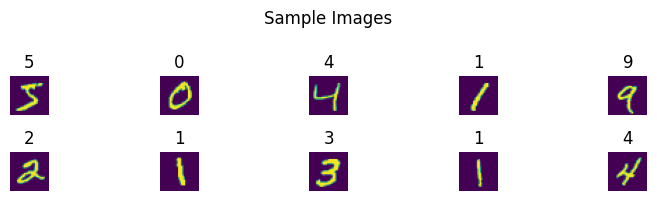

In [3]:
# Visualize a few images from the mnist dataset
def plot_images(images, labels,digits, title="Sample Images"):
    plt.figure(figsize=(8, 2))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(digits[np.argmax(labels[i])])
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
digits = [0,1,2,3,4,5,6,7,8,9]


plot_images(x_train, y_train,digits)

#Step 4: Building basic cnn model

In [4]:
#Building the CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

* Convolutional layers: It takes in an input image and applies a set of filters (or kernels) to create new feature maps.(feature extraction)                         
* For first convolutional layer: Number of filters=32, kernel size=(3,3), Activation function=relu.            
* For second convolutional layer: Number of filters=64.                                 
* Pooling layer: Pooling layer is used to reduce the size of image. Max Pooling takes the maximum value from a feature map’s region.            
* Flatten: Converts 2D feature maps into a 1D vector which is required for the fully connected (dense) layers.                                 
* Fully connected layer: A fully connected layer for classification. Units=128 and activation function=relu.                                          
* Output layer: Number of neurons=10, activation function= softmax(for multi-class classification)
#Compile the model
* Optimizer: The Adam optimizer adjusts the learning rate based on first and second moments of the gradients.
* Categorical cross entropy is used as the loss function for multi-class classification problems.
* metrics=['accuracy']: It Specifies that we want to track accuracy during training and evaluation.

# Step 5: Training and evaluating the model

In [5]:
# Set early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model on the mnist dataset
history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss:{test_loss*100:.2f}%")


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.8883 - loss: 0.3751 - val_accuracy: 0.9851 - val_loss: 0.0464
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 56ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9886 - val_loss: 0.0362
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 53ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9881 - val_loss: 0.0365
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9926 - loss: 0.0221 - val_accuracy: 0.9910 - val_loss: 0.0288
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9953 - loss: 0.0157 - val_accuracy: 0.9915 - val_loss: 0.0250
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.9955 - loss: 0.0122 - val_accuracy: 0.9902 - val_loss: 0.0323
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9911 - val_loss: 0.0298
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.9977 - loss: 0.0081 - 

Explanation:
* Patience=3(If the validation loss doesn’t improve for 3 consecutive epochs, stop the training early.)
* Epochs=10 (The model will train for 10 iterations over the entire dataset.)
* batch_size=64 (The model will process 64 images at a time before updating the weights.)
* The test set is used for validation after each epoch to track the model’s performance on unseen data.
* Evaluate the model: Evaluate loss and accuracy on the test data.

# Result:
For Basic CNN model, the accuracy is 98.96 % and loss is 3.42 %.   


# Step 6: Plot accuracy and loss for training and validation dataset

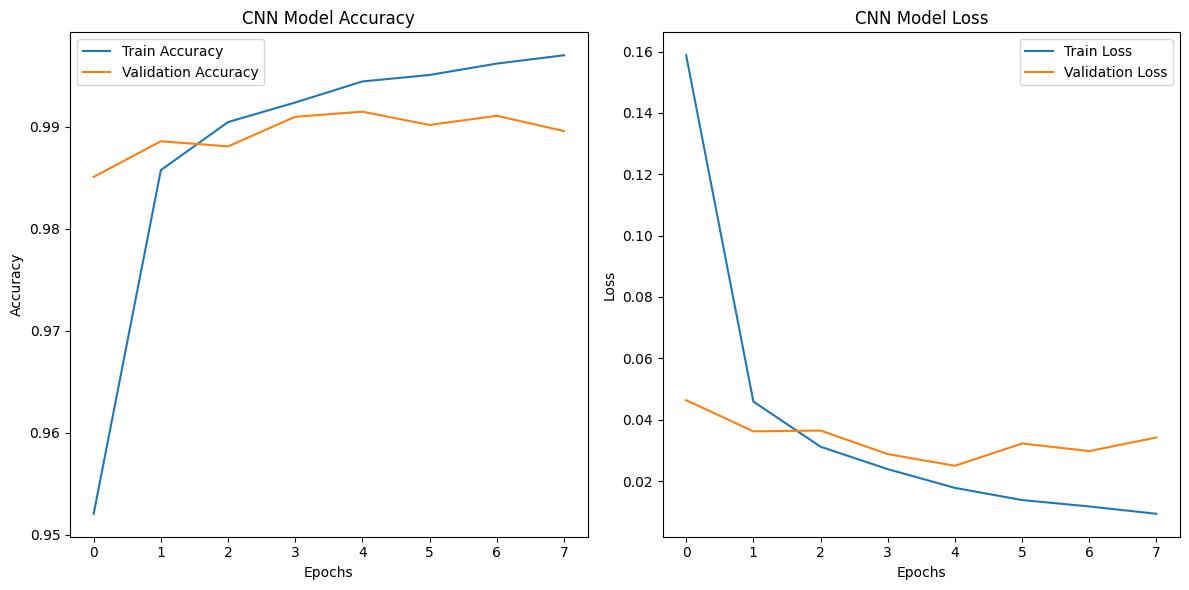

In [6]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


* In the CNN model's accuracy plot, the training accuracy increases with the number of epochs. With each iteration, the model's accuracy continues to improve. For the first two epochs, the accuracy increases rapidly.
* In the CNN model's loss plot, the loss decreases as the number of epochs increases, indicating that the model is learning effectively with each iteration. For the first two epochs, the loss decreases rapidly for the training set.


#Step 6: Add Data Augmentation and train the model with augmented data

In [7]:
# Importing ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by 10%
    height_shift_range=0.1,  # Randomly shift images vertically by 10%
    shear_range=0.1,  # Apply shear transformations
    zoom_range=0.1,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Fit the data generator on the training data
datagen.fit(x_train)
# Train the model using the augmented data
history_augmented =cnn_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                              epochs=15, validation_data=(x_test, y_test))
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss:{test_loss*100:.2f}%")

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 74ms/step - accuracy: 0.8590 - loss: 0.5350 - val_accuracy: 0.9845 - val_loss: 0.0463
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.9580 - loss: 0.1358 - val_accuracy: 0.9778 - val_loss: 0.0687
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.9634 - loss: 0.1135 - val_accuracy: 0.9848 - val_loss: 0.0458
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.9698 - loss: 0.0969 - val_accuracy: 0.9857 - val_loss: 0.0451
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9721 - loss: 0.0870 - val_accuracy: 0.9872 - val_loss: 0.0398
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - accuracy: 0.9745 - loss: 0.0816 - val_accuracy: 0.9901 - val_loss: 0.0326
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.9762 - loss: 0.0739 - val_accuracy: 0.9848 - val_loss: 0.0469
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 73ms/step - accuracy: 0.9762 - loss: 0.0773 - val_accurac

* Data augmentation: It improves Model Generalization, reduces overfitting and enhances robustness.
* By applying various transformations(rotation, flipping, scaling etc) to existing data we can create new training examples.
* ImageDataGenerator class from Keras is used to perform data augmentation during training.


Explanation:

*   Accuracy of the model decreases after data augmentation. Because mnist data is a very simple and clean dataset. Data augmentation makes it harder for the model to recognize data. So, the accuracy decreases.
*  We can improve the accuracy by using batch normalization and learning rate scheduling.
* Epochs=15 is used for better accuracy. Becuase the model needs to see more samples to learn what really defines a digit across different shapes, angles, etc.



#Step 7: Add Batch normalization and dropout

In [8]:
# Build a model with batch normalization
cnn_model_normalized = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    #Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model_normalized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model_normalized.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,626 (1.65 MB)

 Trainable params: 431,434 (1.65 MB)

 Non-trainable params: 192 (768.00 B)

Explanation:
* Batch Normalization is a technique used to improve the training and performance of neural networks.
* Add Batch normalization after each convolutional layer. It normalize the activations and improve the speed.
* Dropout: Dropout helps in shrinking the squared norm of the weights and this tends to a reduction in overfitting.
Randomly sets 25% of the neurons to zero during training.
* Units=256 for fully connected layer (more capacity to learn complex patterns)
I choose 256 units, becuase after batch normalization and dropout, it provides enough data.




#Step 8: Train the model with Batch Normalization

In [9]:
# Train the model with Batch Normalization
history_bn = cnn_model_normalized.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))
test_loss, test_accuracy = cnn_model_normalized.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss:{test_loss*100:.2f}%")


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 80ms/step - accuracy: 0.9328 - loss: 0.2421 - val_accuracy: 0.9849 - val_loss: 0.0475
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9861 - val_loss: 0.0489
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.9938 - loss: 0.0211 - val_accuracy: 0.9858 - val_loss: 0.0432
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 84ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9905 - val_loss: 0.0354
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9948 - loss: 0.0172 - val_accuracy: 0.9859 - val_loss: 0.0577
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 85ms/step - accuracy: 0.9961 - loss: 0.0113 - val_accuracy: 0.9878 - val_loss: 0.0481
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9876 - val_loss: 0.0561
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.9967 - loss: 0.0115 - 

Explanation: The accuracy of the model increases after the batch normalization. Dropout is removed because it decreases the accuracy of the model.

# Step 9: Implement Learning rate Scheduler
Learning rate scheduling can adjust the learning rate dynamically during training, allowing the model to converge more effectively.

We will use ReduceLROnPlateau, a learning rate scheduler that reduces the learning rate when the validation loss plateaus.

In [10]:
# Learning Rate Scheduler (ReduceLROnPlateau)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.5,
                                                    patience=3,
                                                    verbose=1,
                                                    min_lr=0.00001)

# Train the model with learning rate scheduling
history_lr_scheduler = cnn_model_normalized.fit(x_train, y_train, epochs=10, batch_size=64,
                                  validation_data=(x_test, y_test),
                                  callbacks=[lr_scheduler])
test_loss, test_accuracy = cnn_model_normalized.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss:{test_loss*100:.2f}%")



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.9980 - loss: 0.0057 - val_accuracy: 0.9895 - val_loss: 0.0622 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9983 - loss: 0.0067 - val_accuracy: 0.9907 - val_loss: 0.0561 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9911 - val_loss: 0.0586 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9893 - val_loss: 0.0685 - learning_rate: 0.0010
Epoch 5/10
937/938 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9988 - loss: 0.0051
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9898 - val_loss: 0.0736 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 76s 81ms/step - accuracy: 0.9991 - los

Explanation:
* monitor='val_loss': monitor the validation loss.

* factor=0.5: If the validation loss doesn’t improve for patience epochs, it cuts the learning rate in half.

* patience=3:The learning rate will reduce, if the validation loss doesn't improve for 3 epochs.

* min_lr=0.00001: Minimum learning rate.


Result Explanation:
Test accuracy: 99.30%
Test loss= 5.29%.
After data augmentation, batch normalization and learning rate scheduling, the accuracy and loss of the model increases. Because the augmented samples (rotated, shifted, zoomed) are harder to classify confidently. So, the accuracy improves, but loss increases because the predictions are less confident.


# Step 10: Plot accuracy and loss after data augmentation, batch normalization, and learning rate scheduling.

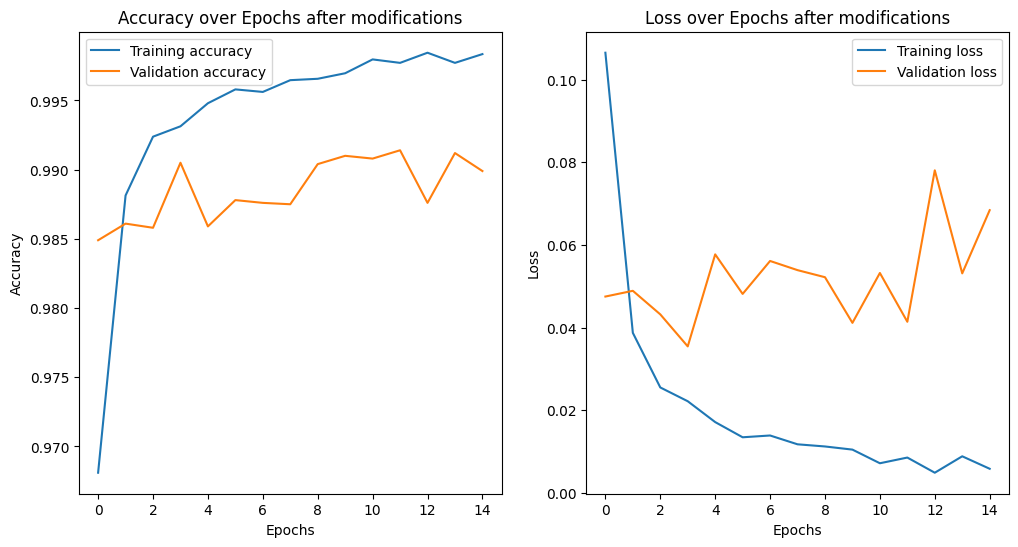

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bn.history['accuracy'], label='Training accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy over Epochs after modifications')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_bn.history['loss'], label='Training loss')
plt.plot(history_bn.history['val_loss'], label='Validation loss')
plt.title('Loss over Epochs after modifications')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()




#Step 11: Predictions

In [12]:
predictions = np.argmax(cnn_model_normalized.predict(x_test), axis=-1)

correct_predictions = np.nonzero(predictions == np.argmax(y_test, axis=-1))[0]  # Compare with argmax of y_test
incorrect_predictions = np.nonzero(predictions != np.argmax(y_test, axis=-1))[0] # Compare with argmax of y_test

print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
9930  classified correctly
70  classified incorrectly


Correctly Classified Images:


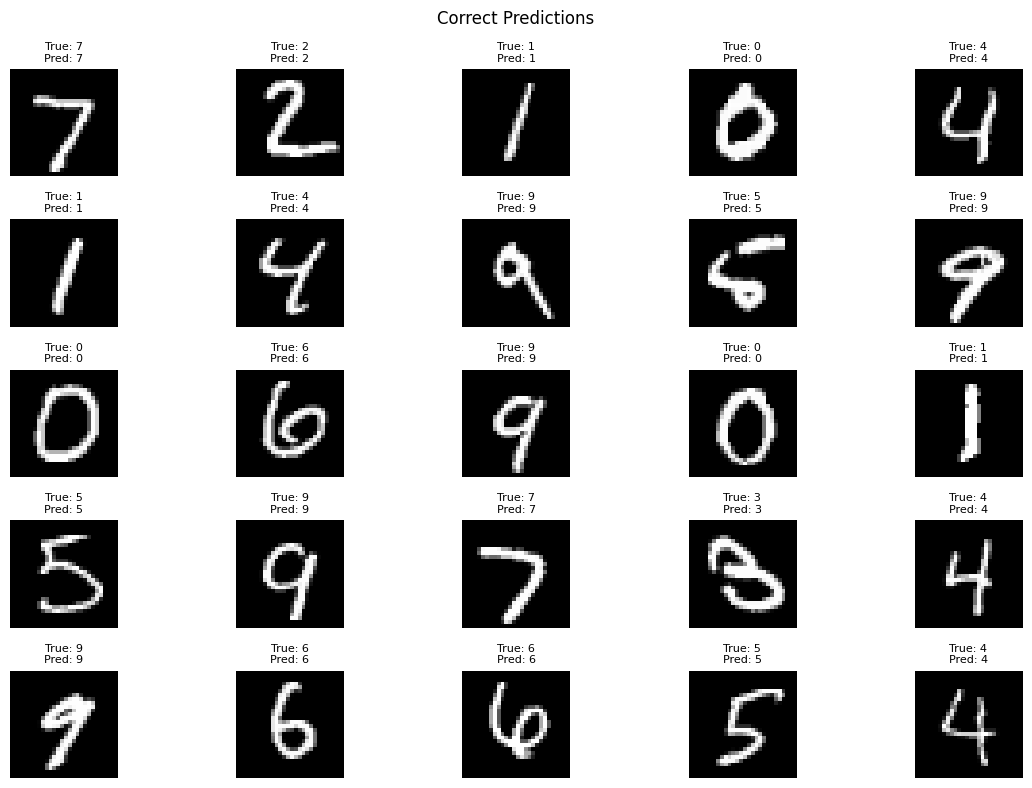


Incorrectly Classified Images:


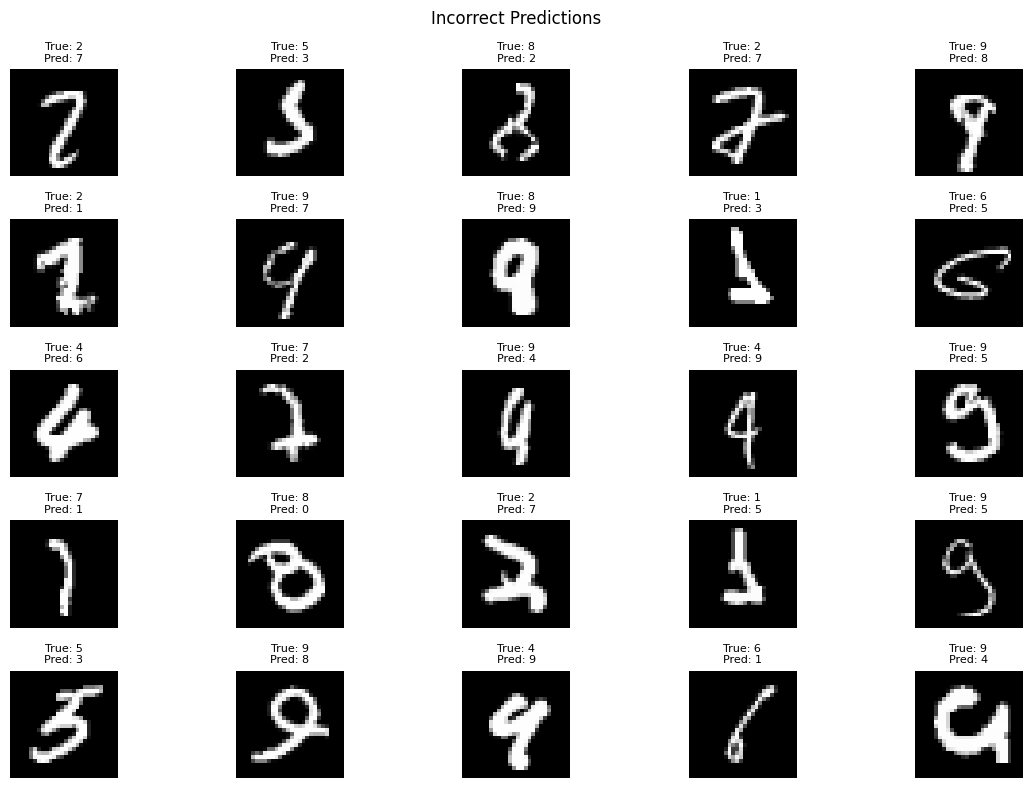

In [14]:
# Function to plot images with their labels
def plot_predictions(images, true_labels, predictions, title="Predictions"):
    plt.figure(figsize=(12, 8))
    for i in range(25):  # Display first 25 predictions
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {np.argmax(true_labels[i])}\nPred: {predictions[i]}", fontsize=8)
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Display some correctly classified images
print("Correctly Classified Images:")
plot_predictions(x_test[correct_predictions[:25]], y_test[correct_predictions[:25]], predictions[correct_predictions[:25]], title="Correct Predictions")

# Display some incorrectly classified images
print("\nIncorrectly Classified Images:")
plot_predictions(x_test[incorrect_predictions[:25]], y_test[incorrect_predictions[:25]], predictions[incorrect_predictions[:25]], title="Incorrect Predictions")

Conclusions:
For mnist dataset, with 5-10 epochs we can achieve 98-99% accuracy. To improve the accuracy, we can add data augmentation, batch normalization and learning rate scheduler.